In [1]:
# !pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
# !pip install --upgrade numpy pandas


In [3]:
import pandas as pd
import numpy as np

In [4]:
train_var = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_variants")
train_text = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_text",
                          sep="\|\|",
                            engine="python",
                              names=["ID","Text"],
                                skiprows=1)

<>:3: SyntaxWarning: invalid escape sequence '\|'
<>:3: SyntaxWarning: invalid escape sequence '\|'
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/553985258.py:3: SyntaxWarning: invalid escape sequence '\|'
  sep="\|\|",


In [5]:
print("coloumns are : ",train_var.columns)
print("shape of the data is : ",train_var.shape)

train_var.head(3)

coloumns are :  Index(['ID', 'Gene', 'Variation', 'Class'], dtype='object')
shape of the data is :  (3321, 4)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2


In [6]:
print("coloumns are : ",train_text.columns)
print(train_text.shape)

train_text.head(3)

coloumns are :  Index(['ID', 'Text'], dtype='object')
(3321, 2)


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...


In [7]:
df = pd.merge(train_var,train_text,on="ID")
df.head(3)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...


In [8]:
df['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [9]:
df['Text'] = df['Text'].str.lower()
df['Gene'] = df['Gene'].str.lower()
df['Variation'] = df['Variation'].str.lower()
df.head(3)

,ID,Gene,Variation,Class,Text
0,0,fam58a,truncating mutations,1,cyclin-dependent kinases (cdks) regulate a var...
1,1,cbl,w802*,2,abstract background non-small cell lung canc...
2,2,cbl,q249e,2,abstract background non-small cell lung canc...


In [10]:
# also replace space with underscore in gene and variation column
df['Gene'] = df['Gene'].str.replace(' ', '_')
df['Variation'] = df['Variation'].str.replace(' ', '_')
df.head(3)

,ID,Gene,Variation,Class,Text
0,0,fam58a,truncating_mutations,1,cyclin-dependent kinases (cdks) regulate a var...
1,1,cbl,w802*,2,abstract background non-small cell lung canc...
2,2,cbl,q249e,2,abstract background non-small cell lung canc...


In [11]:
print(df['Text'].isnull().sum())  # কতগুলো NaN আছে
print(df['Text'].apply(type).value_counts())  # কোন টাইপের ডেটা আছে


5
Text
<class 'str'>      3316
<class 'float'>       5
Name: count, dtype: int64


In [12]:
# drop na the missing Values

df.dropna(inplace=True)

In [13]:
print(df['Text'].isnull().sum())  # কতগুলো NaN আছে
print(df['Text'].apply(type).value_counts())  # কোন টাইপের ডেটা আছে


0
Text
<class 'str'>    3316
Name: count, dtype: int64


In [14]:
# nltlk install stopwords
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [15]:
# remove stop words, punctuations, special characters, numbers etc  
import re
import string   
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text
#df['Text'] = df['Text'].apply(clean_text)
df['Cleaned_Text'] = df['Text'].apply(clean_text)

df.head(3)


<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\S'
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/189891491.py:7: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/189891491.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/189891491.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)


,ID,Gene,Variation,Class,Text,Cleaned_Text
0,0,fam58a,truncating_mutations,1,cyclin-dependent kinases (cdks) regulate a var...,cyclindependent kinases cdks regulate variety ...
1,1,cbl,w802*,2,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...
2,2,cbl,q249e,2,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...


In [16]:
# Lemmatiztion
# lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemma(text):
    y = []
    for i in text.split():
        y.append(lemmatizer.lemmatize(i))  
    return " ".join(y)



In [17]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(lemma)

In [18]:
df.head(5)

,ID,Gene,Variation,Class,Text,Cleaned_Text
0,0,fam58a,truncating_mutations,1,cyclin-dependent kinases (cdks) regulate a var...,cyclindependent kinase cdks regulate variety f...
1,1,cbl,w802*,2,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...
2,2,cbl,q249e,2,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...
3,3,cbl,n454d,3,recent evidence has demonstrated that acquired...,recent evidence demonstrated acquired uniparen...
4,4,cbl,l399v,4,oncogenic mutations in the monomeric casitas b...,oncogenic mutation monomeric casitas blineage ...


In [19]:
df['Text'][0]

"cyclin-dependent kinases (cdks) regulate a variety of fundamental cellular processes. cdk10 stands out as one of the last orphan cdks for which no activating cyclin has been identified and no kinase activity revealed. previous work has shown that cdk10 silencing increases ets2 (v-ets erythroblastosis virus e26 oncogene homolog 2)-driven activation of the mapk pathway, which confers tamoxifen resistance to breast cancer cells. the precise mechanisms by which cdk10 modulates ets2 activity, and more generally the functions of cdk10, remain elusive. here we demonstrate that cdk10 is a cyclin-dependent kinase by identifying cyclin m as an activating cyclin. cyclin m, an orphan cyclin, is the product of fam58a, whose mutations cause star syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. we show that star syndrome-associated cyclin m mutants are unable to interact with cdk10. cyclin m silencing phenocopies cdk1

In [20]:
df = df[['ID', 'Gene', 'Variation', 'Text','Cleaned_Text', 'Class']]
df.head(3)


,ID,Gene,Variation,Text,Cleaned_Text,Class
0,0,fam58a,truncating_mutations,cyclin-dependent kinases (cdks) regulate a var...,cyclindependent kinase cdks regulate variety f...,1
1,1,cbl,w802*,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...,2
2,2,cbl,q249e,abstract background non-small cell lung canc...,abstract background nonsmall cell lung cancer ...,2


In [21]:
df['Class'].value_counts()

Class
7    952
4    686
1    566
2    452
6    273
5    242
3     89
9     37
8     19
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x= df.drop(['Class','ID','Text'],axis=1)
y = df['Class']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [24]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le_gene = LabelEncoder()
le_var = LabelEncoder()
x['Gene'] = le_gene.fit_transform(x['Gene'])
x['Variation'] = le_var.fit_transform(x['Variation'])

In [25]:
import pickle
# Save the label encoders to a file
with open('le_gene.pkl', 'wb') as f:
    pickle.dump(le_gene, f)

with open('le_var.pkl', 'wb') as f:
    pickle.dump(le_var, f)

In [26]:
x_train.head(2)

,Gene,Variation,Cleaned_Text
68,rheb,y35n,gene encoding component signaling axis frequen...
2222,pten,k128n,pten phosphatase tensin homolog phosphatase un...


In [27]:
# tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(df['Cleaned_Text'])
x_train_tfidf = tfidf.transform(x_train['Cleaned_Text']).toarray()
x_test_tfidf = tfidf.transform(x_test['Cleaned_Text']).toarray()


In [28]:
# Save the tfidf vectorizer to a file
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [29]:
x_train.head(2)

,Gene,Variation,Cleaned_Text
68,rheb,y35n,gene encoding component signaling axis frequen...
2222,pten,k128n,pten phosphatase tensin homolog phosphatase un...


In [30]:
x_train_tfidf
print(x_train_tfidf.shape)


(2652, 5000)


In [31]:
unique_words = tfidf.get_feature_names_out()
print("Number of unique words in the corpus:", len(unique_words))
print(unique_words)

Number of unique words in the corpus: 5000
['aa' 'aacr' 'ab' ... 'μl' 'μm' 'μmoll']


In [32]:
df_train = pd.DataFrame(x_train_tfidf, columns=unique_words)
df_train.head(2)

,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,aberrant,aberrantly,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001251,0.0,...,0.0,0.0,0.067933,0.0,0.0,0.005056,0.0,0.007272,0.003815,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [33]:
df_train.shape

(2652, 5000)

In [34]:
df_test = pd.DataFrame(x_test_tfidf, columns=unique_words)
df_test.head(2)

,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,aberrant,aberrantly,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
0,0.0,0.0,0.0,0.004855,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.006431,0.01424,0.0074,0.009706,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0000,0.019918,0.0


In [35]:
df_train.head(2)

,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,aberrant,aberrantly,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001251,0.0,...,0.0,0.0,0.067933,0.0,0.0,0.005056,0.0,0.007272,0.003815,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [36]:
df_test.head(2)

,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,aberrant,aberrantly,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
0,0.0,0.0,0.0,0.004855,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.006431,0.01424,0.0074,0.009706,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0000,0.019918,0.0


In [37]:
df_train.shape

(2652, 5000)

In [38]:
x_train.head(2)

,Gene,Variation,Cleaned_Text
68,rheb,y35n,gene encoding component signaling axis frequen...
2222,pten,k128n,pten phosphatase tensin homolog phosphatase un...


In [39]:
x_train.drop(['Cleaned_Text'],axis=1,inplace=True)

In [40]:
x_test.drop(['Cleaned_Text'],axis=1,inplace=True)

In [41]:
x_train

,Gene,Variation
68,rheb,y35n
2222,pten,k128n
355,ep300,c1385
685,cdkn2a,i49s
0,fam58a,truncating_mutations
...,...,...
3185,rara,r276w
3245,ddr2,g774v
2635,brca1,p1856t
2060,mycn,p44l


In [42]:
x_test

,Gene,Variation
3234,ntrk3,etv6-ntrk3_fusion
2165,pten,p38l
504,tp53,r282w
1809,rhoa,t37a
3,cbl,n454d
...,...,...
2596,brca1,g1788d
1998,map2k1,q56_v60del
2615,brca1,t47d
2486,brca1,s1841r


In [43]:
train_df =pd.merge(x_train,df_train,left_index=True,right_index=True)

In [44]:
test_df =pd.merge(x_test,df_test,left_index=True,right_index=True)

In [45]:
x_train.shape

(2652, 2)

In [46]:
train_df.head(2)

,Gene,Variation,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
68,rheb,y35n,0.0,0.0,0.003909,0.00344,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002622,0.029802,0.0
2222,pten,k128n,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [47]:
test_df.head(2)

,Gene,Variation,aa,aacr,ab,abbreviation,abc,abcam,abd,abdominal,...,βgalactosidase,βsheet,γphosphate,γsecretase,δbraf,μg,μgml,μl,μm,μmoll
504,tp53,r282w,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.007551,0.000000,0.0,0.0
3,cbl,n454d,0.0,0.0,0.0,0.0,0.0,0.004827,0.0,0.0,...,0.004901,0.0,0.0,0.0,0.0,0.014327,0.015860,0.003297,0.0,0.0


In [48]:
x_train.shape

(2652, 2)

In [49]:
train_df.shape

(2116, 5002)

In [50]:
x_train_tfidf.shape

(2652, 5000)

In [51]:
print(type(x_train))
print(type(x_train_tfidf))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [52]:
from scipy.sparse import issparse
import numpy as np
def safe_to_dense(X):
    if issparse(X):
        return X.toarray()
    elif hasattr(X, "to_numpy"):  # DataFrame
        return X.to_numpy()
    else:  # NumPy array বা list
        return np.array(X)

merge_df_training = np.hstack((
    safe_to_dense(x_train),
    safe_to_dense(x_train_tfidf)
))


In [53]:
merge_df_testing = np.hstack((
    safe_to_dense(x_test),
    safe_to_dense(x_test_tfidf)
))

# smote


In [54]:
df.shape

(3316, 6)

In [55]:
y_train.shape

(2652,)

In [56]:
x_train_numeric = x_train.select_dtypes(include=[np.number])
merge_df_training = np.hstack((
    x_train_numeric.to_numpy(),
    x_train_tfidf
))


In [57]:
x_test_numeric = x_test.select_dtypes(include=[np.number])
merge_df_testing = np.hstack((
    x_test_numeric.to_numpy(),
    x_test_tfidf
))

In [58]:
merge_df_training = merge_df_training.astype(float)
merge_df_testing = merge_df_testing.astype(float)

In [59]:
# imblearn for handling imbalanced data
!pip install imblearn
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]


In [60]:
#smote 

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(merge_df_training, y_train)

In [61]:
x_train_res.shape, y_train_res.shape

((6849, 5000), (6849,))

In [62]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_res, y_train_res)
y_pred = rf.predict(merge_df_testing)

In [63]:
# accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("accuracy is : ", acc)
print("classification report : \n", classification_report(y_test, y_pred))

accuracy is :  0.625
classification report : 
               precision    recall  f1-score   support

           1       0.56      0.51      0.54       113
           2       0.59      0.56      0.57        91
           3       0.30      0.39      0.34        18
           4       0.69      0.64      0.66       137
           5       0.34      0.40      0.37        48
           6       0.82      0.60      0.69        55
           7       0.70      0.81      0.75       191
           8       0.00      0.00      0.00         4
           9       1.00      0.71      0.83         7

    accuracy                           0.62       664
   macro avg       0.56      0.51      0.53       664
weighted avg       0.63      0.62      0.62       664



/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/metrics/_clas

In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1)
log_reg.fit(x_train_res, y_train_res)
y_pred = log_reg.predict(merge_df_testing)  
acc = accuracy_score(y_test, y_pred)
print("accuracy is : ", acc)
print("classification report : \n", classification_report(y_test, y_pred))  


accuracy is :  0.5993975903614458
classification report : 
               precision    recall  f1-score   support

           1       0.54      0.50      0.52       113
           2       0.51      0.53      0.52        91
           3       0.30      0.56      0.39        18
           4       0.70      0.58      0.64       137
           5       0.33      0.48      0.39        48
           6       0.69      0.62      0.65        55
           7       0.74      0.72      0.73       191
           8       0.67      0.50      0.57         4
           9       0.67      0.86      0.75         7

    accuracy                           0.60       664
   macro avg       0.57      0.59      0.57       664
weighted avg       0.62      0.60      0.61       664



/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(30, 100, 5))}
neigh = KNeighborsClassifier()

# GridSearchCV object
Gsv = GridSearchCV(neigh, parameters,cv=5, scoring='f1_macro')

# IMPORTANT: fit on training data
Gsv.fit(x_train_res, y_train_res)

# Now you can get the best parameters
print("Best K:", Gsv.best_params_)
print("Best Score:", Gsv.best_score_)


Best K: {'n_neighbors': 30}
Best Score: 0.6261436363368851


In [66]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_res, y_train_res)
y_pred = knn.predict(merge_df_testing)  
acc = accuracy_score(y_test, y_pred)
print("accuracy is : ", acc)
print("classification report : \n", classification_report(y_test, y_pred))  




accuracy is :  0.36596385542168675
classification report : 
               precision    recall  f1-score   support

           1       0.44      0.37      0.40       113
           2       0.41      0.55      0.47        91
           3       0.10      0.50      0.16        18
           4       0.66      0.32      0.43       137
           5       0.19      0.42      0.26        48
           6       0.57      0.55      0.56        55
           7       0.72      0.21      0.33       191
           8       0.05      0.50      0.08         4
           9       0.17      0.71      0.28         7

    accuracy                           0.37       664
   macro avg       0.37      0.46      0.33       664
weighted avg       0.54      0.37      0.39       664



# highly Imbalance data 

## this dataset is highly imbalance , specilly in class coloumn so w have to apply smote 

/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


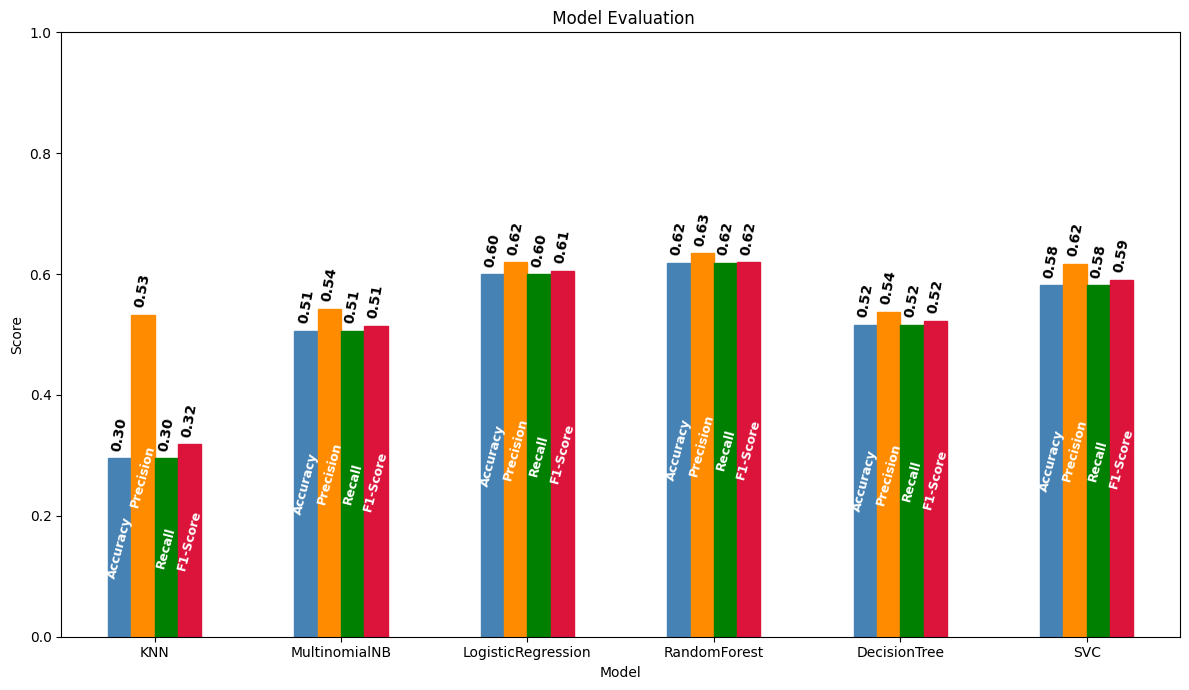

In [67]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=60),
    'MultinomialNB': MultinomialNB(alpha=1),
    'LogisticRegression': LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(kernel='linear', C=1, random_state=42)

}


results = []
for name, model in models.items():
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(merge_df_testing)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).set_index('Model')

# Plotting
ax = df_results.plot(kind='bar', figsize=(12,7), legend=False)
plt.title(" Model Evaluation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Bar color mapping to metric names
colors = {
    'Accuracy': 'steelblue',
    'Precision': 'darkorange',
    'Recall': 'green',
    'F1-Score': 'crimson'
}

# Manually set colors to bars + add metric label inside each bar
for bars, metric_name in zip(ax.containers, df_results.columns):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold',rotation =80)
        ax.text(bar.get_x() + bar.get_width() / 2, height / 2, metric_name,
                ha='center', va='center', color='white', fontsize=9, fontweight='bold',rotation =75)
        bar.set_color(colors[metric_name])  # Set custom color

plt.tight_layout()
plt.show()



In [68]:
!pip install prettytable
from prettytable import PrettyTable

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add rows from df_results
for model_name, row in df_results.iterrows():
    accuracy = round(row['Accuracy'], 2)
    precision = round(row['Precision'], 2)
    recall = round(row['Recall'], 2)
    f1 = round(row['F1-Score'], 2)

    table.add_row([model_name, accuracy, precision, recall, f1])

print(table)
best_model = df_results['F1-Score'].idxmax()
print("The Best model is : ",best_model)


+--------------------+----------+-----------+--------+----------+
|       Model        | Accuracy | Precision | Recall | F1-Score |
+--------------------+----------+-----------+--------+----------+
|        KNN         |   0.3    |    0.53   |  0.3   |   0.32   |
|   MultinomialNB    |   0.51   |    0.54   |  0.51  |   0.51   |
| LogisticRegression |   0.6    |    0.62   |  0.6   |   0.61   |
|    RandomForest    |   0.62   |    0.63   |  0.62  |   0.62   |
|    DecisionTree    |   0.52   |    0.54   |  0.52  |   0.52   |
|        SVC         |   0.58   |    0.62   |  0.58  |   0.59   |
+--------------------+----------+-----------+--------+----------+
The Best model is :  RandomForest


In [69]:
# create pckle file for Rndom forest model
import pickle
# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [70]:
print(le_gene.classes_)


['abl1' 'acvr1' 'ago2' 'akt1' 'akt2' 'akt3' 'alk' 'apc' 'ar' 'araf'
 'arid1a' 'arid1b' 'arid2' 'asxl1' 'asxl2' 'atm' 'atr' 'atrx' 'aurka'
 'aurkb' 'axin1' 'axl' 'b2m' 'bap1' 'bard1' 'bcl10' 'bcl2' 'bcl2l11'
 'bcor' 'braf' 'brca1' 'brca2' 'brd4' 'brip1' 'btk' 'card11' 'carm1'
 'casp8' 'cbl' 'ccnd1' 'ccnd2' 'ccnd3' 'ccne1' 'cdh1' 'cdk12' 'cdk4'
 'cdk6' 'cdk8' 'cdkn1a' 'cdkn1b' 'cdkn2a' 'cdkn2b' 'cdkn2c' 'cebpa'
 'chek2' 'cic' 'crebbp' 'ctcf' 'ctla4' 'ctnnb1' 'ddr2' 'dicer1' 'dnmt3a'
 'dnmt3b' 'dusp4' 'egfr' 'eif1ax' 'elf3' 'ep300' 'epas1' 'epcam' 'erbb2'
 'erbb3' 'erbb4' 'ercc2' 'ercc3' 'ercc4' 'erg' 'errfi1' 'esr1' 'etv1'
 'etv6' 'ewsr1' 'ezh2' 'fam58a' 'fanca' 'fancc' 'fat1' 'fbxw7' 'fgf19'
 'fgf3' 'fgf4' 'fgfr1' 'fgfr2' 'fgfr3' 'fgfr4' 'flt3' 'foxa1' 'foxl2'
 'foxo1' 'foxp1' 'fubp1' 'gata3' 'gli1' 'gna11' 'gnaq' 'gnas' 'h3f3a'
 'hist1h1c' 'hla-a' 'hla-b' 'hnf1a' 'hras' 'idh1' 'idh2' 'igf1r' 'ikbke'
 'ikzf1' 'il7r' 'inpp4b' 'jak1' 'jak2' 'jun' 'kdm5a' 'kdm5c' 'kdm6a' 'kdr'
 'keap1' 'ki

In [71]:
print(le_var.classes_)


['1_2009trunc' '2010_2471trunc' '256_286trunc' ... 'yap1-mamld1_fusion'
 'zc3h7b-bcor_fusion' 'znf198-fgfr1_fusion']


In [74]:
# main pipeline 

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load and merge training data
train_var = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_variants")
train_text = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_text",
                          sep="\|\|",
                            engine="python",
                              names=["ID","Text"],
                                skiprows=1)
df = pd.merge(train_var, train_text, on="ID")

# Clean columns
df['Text'] = df['Text'].str.lower()
df['Gene'] = df['Gene'].str.lower().str.replace(' ', '_')
df['Variation'] = df['Variation'].str.lower().str.replace(' ', '_')
df.dropna(inplace=True)

# Optional: Clean text further (lemmatization, stopwords removal, etc.)

# Final feature set
df = df[["Gene", "Variation", "Text", "Class"]]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("gene_enc", OneHotEncoder(handle_unknown="ignore"), ["Gene"]),
    ("var_enc", OneHotEncoder(handle_unknown="ignore"), ["Variation"]),
    ("text_vec", TfidfVectorizer(max_features=5000), "Text")
])

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier())
])

# Train pipeline
pipeline.fit(df[["Gene", "Variation", "Text"]], df["Class"])

# Save pipeline
with open("final_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


<>:14: SyntaxWarning: invalid escape sequence '\|'
<>:14: SyntaxWarning: invalid escape sequence '\|'
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/2222957323.py:14: SyntaxWarning: invalid escape sequence '\|'
  sep="\|\|",


In [75]:
import pandas as pd
import re
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load and merge training data
train_var = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_variants")
train_text = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_text",
                          sep="\|\|",
                            engine="python",
                              names=["ID","Text"],
                                skiprows=1)
df = pd.merge(train_var, train_text, on="ID")

# Clean categorical features
df['Gene'] = df['Gene'].str.lower().str.replace(' ', '_')
df['Variation'] = df['Variation'].str.lower().str.replace(' ', '_')

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)
    return text

df.dropna(subset=["Text"], inplace=True)
df['Text'] = df['Text'].apply(clean_text)

# Split features and target
X = df[["Gene", "Variation", "Text"]]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ("gene_enc", OneHotEncoder(handle_unknown="ignore"), ["Gene"]),
    ("var_enc", OneHotEncoder(handle_unknown="ignore"), ["Variation"]),
    ("text_vec", TfidfVectorizer(max_features=5000, stop_words='english'), "Text")
])

# Models to test
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='saga', class_weight='balanced'),
    "Multinomial NB": MultinomialNB(),
    "SVM (Linear)": SVC(kernel='linear', class_weight='balanced')
}

# Evaluate each model with SMOTE
for name, model in models.items():
    pipeline = ImbPipeline([
        ("preprocess", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy with SMOTE: {acc:.4f}")


<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/1066002218.py:18: SyntaxWarning: invalid escape sequence '\|'
  sep="\|\|",


Random Forest Accuracy with SMOTE: 0.6280


KeyboardInterrupt: 

In [77]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.3 MB/s  0:00:01 eta 0:00:01


In [78]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and merge training data
train_var = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_variants")
train_text = pd.read_csv("/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/training_text",
                          sep="\|\|",
                            engine="python",
                              names=["ID","Text"],
                                skiprows=1)
df = pd.merge(train_var, train_text, on="ID")

# Clean columns
df['Text'] = df['Text'].str.lower()
df['Gene'] = df['Gene'].str.lower().str.replace(' ', '_')
df['Variation'] = df['Variation'].str.lower().str.replace(' ', '_')
df.dropna(inplace=True)

# Final feature set
df = df[["Gene", "Variation", "Text", "Class"]]
x = df[["Gene", "Variation", "Text"]]
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("gene_enc", OneHotEncoder(handle_unknown="ignore"), ["Gene"]),
    ("var_enc", OneHotEncoder(handle_unknown="ignore"), ["Variation"]),
    ("text_vec", TfidfVectorizer(max_features=5000), "Text")
])

# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=300, solver='saga', class_weight='balanced'),
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    
}

# Store trained models + accuracies
trained_models = {}
model_performance = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

    trained_models[name] = pipeline
    model_performance[name] = round(acc * 100, 2)

# Save everything in one pickle
with open("final_pipeline1.pkl", "wb") as f:
    pickle.dump({"models": trained_models, "performance": model_performance}, f)

print("✅ All models trained and saved successfully!")


<>:18: SyntaxWarning: invalid escape sequence '\|'
<>:18: SyntaxWarning: invalid escape sequence '\|'
/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_61298/543830588.py:18: SyntaxWarning: invalid escape sequence '\|'
  sep="\|\|",


Random Forest Accuracy: 0.6205


/Users/anukulchandra/Python_with_machine_learning_ESPML_2405/Personalized_Cancer_Prediction-Doctor_Side-/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.6250
SVM Accuracy: 0.6476
Decision Tree Accuracy: 0.5768
✅ All models trained and saved successfully!
